# Import Libraries

In [269]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/google-play-store.csv')

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [273]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [274]:
data.shape

(10841, 13)

# Data Preprocessing

In [275]:
# Check thong tin size cua dataset
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [0]:
# Preporcessing App Size
def size_fix(x):
    if x[-1] == 'M':
        return format(float(x[:-1]), '.2f')
    elif x[-1] == 'k':
        return format(float(x[:-1])/1024, '.2f')
    elif x == 'Varies with device':
        return np.nan

In [0]:
data['Size'] = data['Size'].apply(size_fix)
data['Size'] = pd.to_numeric(data['Size'])

In [278]:
# Take a look at Installs data
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [0]:
# Preprocessing Install data
def installs_fix(x):
    if x[-1] == '+':
        x = x[:-1]
    x= x.replace(',', '')
    return x

In [0]:
import re
data = data[data.Installs.str.contains('\d+\+')]

In [0]:
data['Installs'] = data['Installs'].apply(installs_fix)
data['Installs'] = pd.to_numeric(data['Installs'])

In [282]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [283]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [0]:
def price_fix(x):
    if x[0] == '$':
        return x[1:]
    return x

In [0]:
data['Price'] = data['Price'].apply(price_fix)
data['Price'] = pd.to_numeric(data['Price'])

In [286]:
data.describe()

,Rating,Size,Installs,Price
count,9366.000000,9145.000000,1.083900e+04,10839.000000
mean,4.191757,21.516175,1.546577e+07,1.027463
std,0.515219,22.589075,8.503315e+07,15.950436
min,1.000000,0.010000,0.000000e+00,0.000000
25%,4.000000,4.900000,3.000000e+03,0.000000
50%,4.300000,13.000000,1.000000e+05,0.000000
75%,4.500000,30.000000,5.000000e+06,0.000000
max,5.000000,100.000000,1.000000e+09,400.000000


In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
App               10839 non-null object
Category          10839 non-null object
Rating            9366 non-null float64
Reviews           10839 non-null object
Size              9145 non-null float64
Installs          10839 non-null int64
Type              10839 non-null object
Price             10839 non-null float64
Content Rating    10839 non-null object
Genres            10839 non-null object
Last Updated      10839 non-null object
Current Ver       10831 non-null object
Android Ver       10837 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [0]:
data['Reviews'] = pd.to_numeric(data['Reviews'])

In [0]:
data1 = data[(data['Rating'] >= 4) & (data['Reviews'] >= 400000) & (data['Installs'] >= 15000000)]

# Rating Distribution

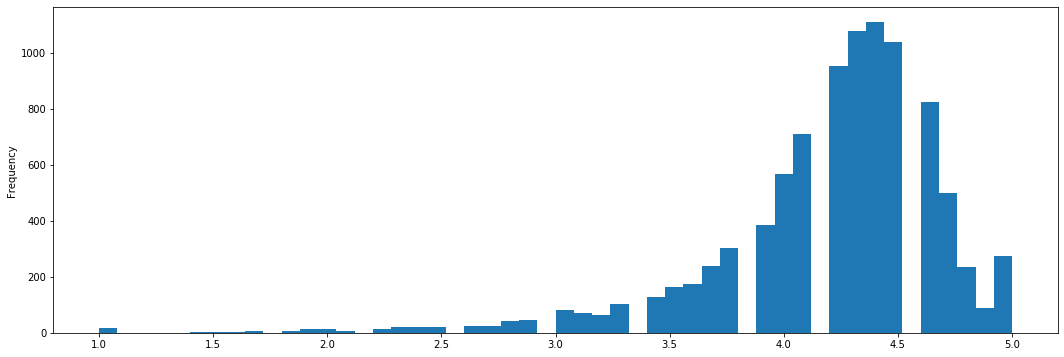

In [290]:
fig, ax = plt.subplots(figsize=(18,6))
data['Rating'].plot.hist(bins=50)
plt.show()

# Ratings Across Categories

In [291]:
cat = data['Category'].unique().tolist()
print(cat, len(cat))


['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'] 33


In [292]:
avg_ratings = [data[data['Category'] == c]['Rating'].mean() for c in cat]
print(avg_ratings)

[4.358064516129031, 4.19041095890411, 4.278571428571428, 4.346067415730338, 4.121452145214522, 4.155172413793104, 4.158536585365852, 3.9707692307692306, 4.389032258064517, 4.126174496644294, 4.435555555555557, 4.131888544891644, 4.1669724770642205, 4.2771043771043775, 4.197368421052633, 4.178461538461538, 4.094904458598724, 4.2863263445761195, 4.192272467086437, 4.18914285714286, 4.255598455598457, 4.259663865546221, 4.192113564668767, 4.223510971786835, 4.10929203539823, 4.047411444141691, 4.335987261146501, 4.211396011396012, 4.300000000000001, 4.243999999999999, 4.063750000000001, 4.1321888412017165, 4.051612903225806]


In [293]:
cat_ratings = {'Category':cat, 'Avg Rating': avg_ratings}
pd.DataFrame(cat_ratings, columns=['Category', 'Avg Rating']).sort_values(by='Avg Rating', ascending=False)

,Category,Avg Rating
10,EVENTS,4.435556
8,EDUCATION,4.389032
0,ART_AND_DESIGN,4.358065
3,BOOKS_AND_REFERENCE,4.346067
26,PERSONALIZATION,4.335987
28,PARENTING,4.300000
17,GAME,4.286326
2,BEAUTY,4.278571
13,HEALTH_AND_FITNESS,4.277104
21,SHOPPING,4.259664


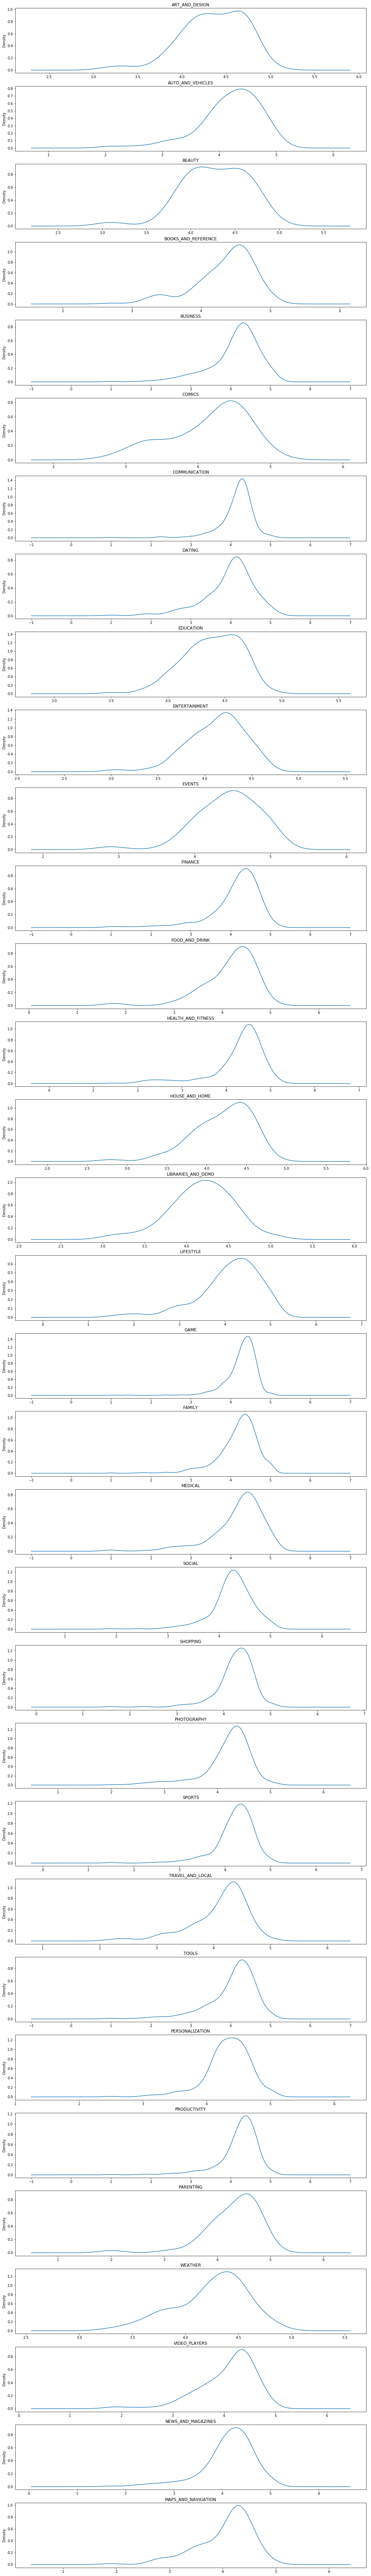

In [294]:
fig, ax = plt.subplots(figsize=(18, 135), nrows=33)
for i, c in enumerate(cat):
    ax[i].set_title(c)
    data[data['Category'] == c]['Rating'].plot.kde(ax= ax[i])
plt.show()

# Category Distribution

In [295]:
data['Category'].value_counts()

FAMILY                 1971
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [296]:
data['Category'].value_counts().sum()

10839

In [297]:
print('Mean = ',  1 / len(cat))
data['Category'].value_counts() / data['Category'].value_counts().sum()

Mean =  0.030303030303030304


FAMILY                 0.181843
GAME                   0.105545
TOOLS                  0.077775
MEDICAL                0.042716
BUSINESS               0.042439
PRODUCTIVITY           0.039118
PERSONALIZATION        0.036166
COMMUNICATION          0.035704
SPORTS                 0.035428
LIFESTYLE              0.035243
FINANCE                0.033767
HEALTH_AND_FITNESS     0.031460
PHOTOGRAPHY            0.030907
SOCIAL                 0.027217
NEWS_AND_MAGAZINES     0.026109
SHOPPING               0.023987
TRAVEL_AND_LOCAL       0.023803
DATING                 0.021589
BOOKS_AND_REFERENCE    0.021312
VIDEO_PLAYERS          0.016145
EDUCATION              0.014392
ENTERTAINMENT          0.013747
MAPS_AND_NAVIGATION    0.012640
FOOD_AND_DRINK         0.011717
HOUSE_AND_HOME         0.008119
LIBRARIES_AND_DEMO     0.007842
AUTO_AND_VEHICLES      0.007842
WEATHER                0.007565
ART_AND_DESIGN         0.005997
EVENTS                 0.005905
PARENTING              0.005536
COMICS  

In [298]:
# Get list categories that have small data
cat_all = pd.DataFrame(data['Category'].value_counts()/data['Category'].value_counts().sum()).reset_index()
cat_all[cat_all['Category'] < 0.02]['index'].values

array(['VIDEO_PLAYERS', 'EDUCATION', 'ENTERTAINMENT',
       'MAPS_AND_NAVIGATION', 'FOOD_AND_DRINK', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'AUTO_AND_VEHICLES', 'WEATHER',
       'ART_AND_DESIGN', 'EVENTS', 'PARENTING', 'COMICS', 'BEAUTY'],
      dtype=object)

In [299]:
# Set these cateogries to Others
cat_all['index'] = cat_all['index'].apply(lambda x : 'OTHERS' if x in cat_all[cat_all['Category'] < 0.02]['index'].values else x)
cat_all.groupby('index')['Category'].sum().sort_values(ascending=False)

index
FAMILY                 0.181843
OTHERS                 0.127872
GAME                   0.105545
TOOLS                  0.077775
MEDICAL                0.042716
BUSINESS               0.042439
PRODUCTIVITY           0.039118
PERSONALIZATION        0.036166
COMMUNICATION          0.035704
SPORTS                 0.035428
LIFESTYLE              0.035243
FINANCE                0.033767
HEALTH_AND_FITNESS     0.031460
PHOTOGRAPHY            0.030907
SOCIAL                 0.027217
NEWS_AND_MAGAZINES     0.026109
SHOPPING               0.023987
TRAVEL_AND_LOCAL       0.023803
DATING                 0.021589
BOOKS_AND_REFERENCE    0.021312
Name: Category, dtype: float64

In [300]:
# Get Cateory from Popular Apps
cat_popular = (data1['Category'].value_counts()/data1['Category'].value_counts().sum()).reset_index()
cat_popular[cat_popular['Category'] < 0.02]['index'].values

array(['ENTERTAINMENT', 'SPORTS', 'HEALTH_AND_FITNESS', 'BUSINESS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'MAPS_AND_NAVIGATION',
       'WEATHER', 'EDUCATION', 'FINANCE', 'LIFESTYLE'], dtype=object)

In [301]:
# Get distribution for Popular Apps
cat_popular['index'] = cat_popular['index'].apply(lambda x : 'OTHERS' if x in cat_popular[cat_popular['Category'] < 0.02]['index'].values else x)
cat_popular.groupby('index')['Category'].sum().sort_values(ascending=False)

index
GAME                0.306983
COMMUNICATION       0.110672
OTHERS              0.097497
FAMILY              0.090909
PHOTOGRAPHY         0.086957
PRODUCTIVITY        0.073781
TOOLS               0.064559
SOCIAL              0.057971
SHOPPING            0.039526
PERSONALIZATION     0.027668
TRAVEL_AND_LOCAL    0.022398
VIDEO_PLAYERS       0.021080
Name: Category, dtype: float64

Seems Game and Communication have most ratio

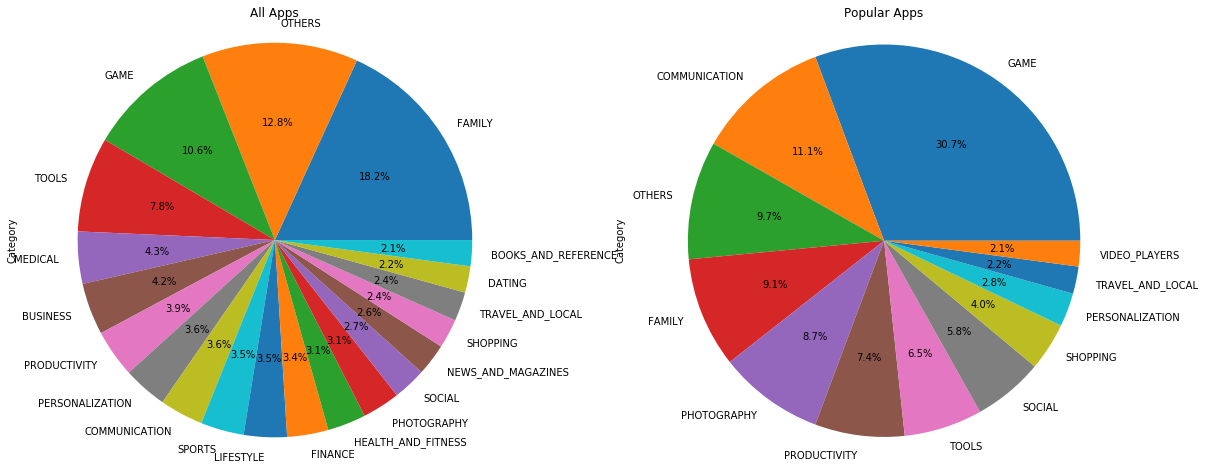

In [302]:
# Plot Category distribution
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2)
cat_all.groupby('index')['Category'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('All Apps'); ax[0].axis('equal')
cat_popular.groupby('index')['Category'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Popular Apps'); ax[1].axis('equal')
plt.show()

**Right!**

Although Family has most number app but Game is the most one in popular App dataset



# Conent Rating Distribution

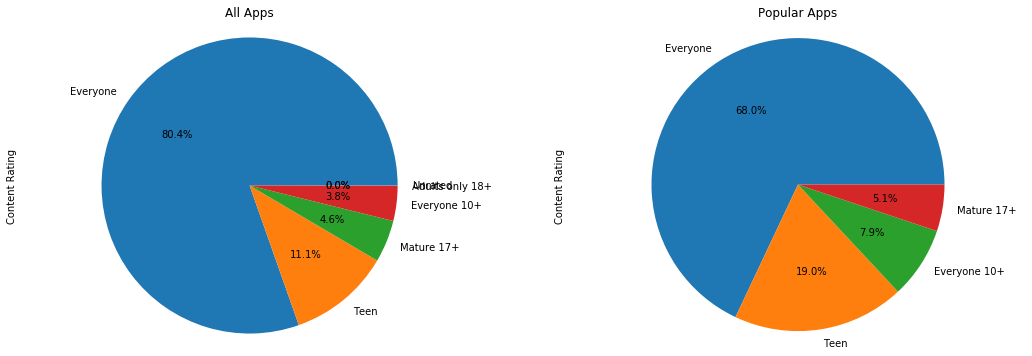

In [303]:
fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=2)
data['Content Rating'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('All Apps'); ax[0].axis('equal')
data1['Content Rating'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Popular Apps'); ax[1].axis('equal')
plt.show()

# Genres Distribution

In [0]:
gen_all = pd.DataFrame(data['Genres'].value_counts()/data['Genres'].value_counts().sum()).reset_index()
gen_all['index'] = gen_all['index'].apply(lambda x : 'OTHERS' if x in gen_all[gen_all['Genres'] < 0.02]['index'].values else x)

In [0]:
gen_popular = pd.DataFrame(data['Genres'].value_counts()/data['Genres'].value_counts().sum()).reset_index()
gen_popular['index'] = gen_popular['index'].apply(lambda x : 'OTHERS' if x in gen_popular[gen_popular['Genres'] < 0.02]['index'].values else x)

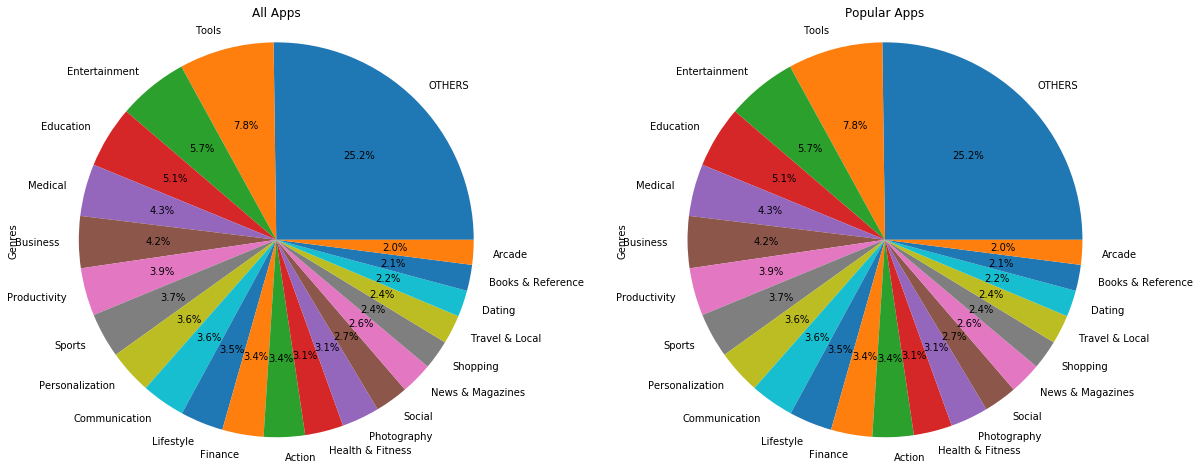

In [306]:
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2)
gen_all.groupby('index')['Genres'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('All Apps'); ax[0].axis('equal')
gen_popular.groupby('index')['Genres'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Popular Apps'); ax[1].axis('equal')
plt.show()

## Genres Distribution for GAME

In [0]:
game_all = pd.DataFrame(data[data['Category'] == 'GAME']['Genres'].value_counts()/data[data['Category'] == 'GAME']['Genres'].value_counts().sum()).reset_index()
game_all['index'] = game_all['index'].apply(lambda x : 'OTHERS' if x in game_all[game_all['Genres'] < 0.02]['index'].values else x)

In [0]:
game_popular = pd.DataFrame(data1[data1['Category'] == 'GAME']['Genres'].value_counts()/data1[data1['Category'] == 'GAME']['Genres'].value_counts().sum()).reset_index()
game_popular['index'] = game_popular['index'].apply(lambda x : 'OTHERS' if x in game_popular[game_popular['Genres'] < 0.02]['index'].values else x)

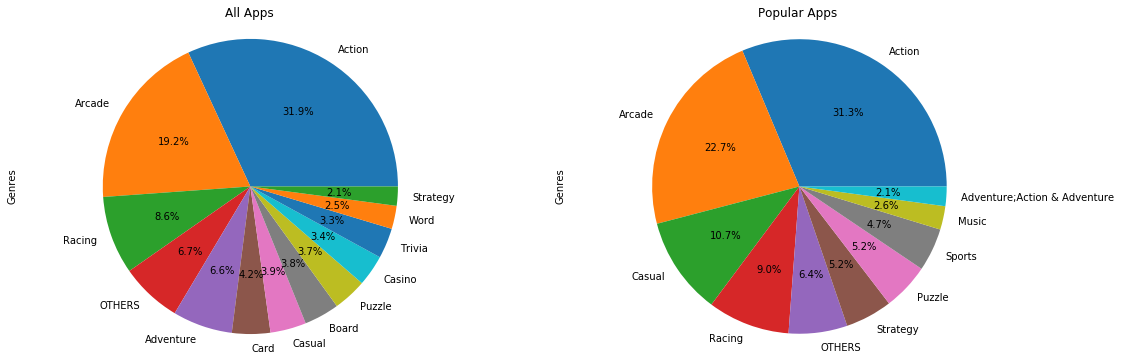

In [309]:
fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=2)
game_all.groupby('index')['Genres'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('All Apps'); ax[0].axis('equal')
game_popular.groupby('index')['Genres'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('Popular Apps'); ax[1].axis('equal')
plt.show()

# Correlation

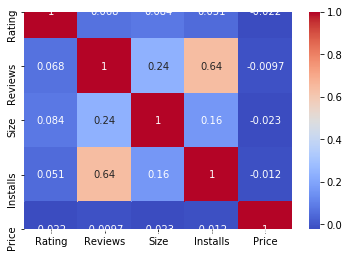

In [310]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Summary

- Family is category has most number of app. But Game is the most one for popular apps. So to start an App, just do Game.
- People seem like Action and Arcade game.
- Most of these apps have a good rating. People are easy for rating.



# Save Data


In [0]:
path_csv = '/content/drive/My Drive/Colab Notebooks/data_week_4.csv'
data.to_csv(path_csv)